In [1]:
import os
import sys

global SRC
SRC = '/home/ubuntu/uncover-ml'
os.environ['UNCOVERML_SRC'] = SRC
sys.path.append(os.path.join(SRC, 'uncoverml'))

In [2]:
import os
import json
import math
from collections import defaultdict

import matplotlib.pyplot as plt

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'out',
                    'sirsam_Na_randomforest_transformed_targets.csv')

target_histograms = diagnostics.plot_target_scaling(path)




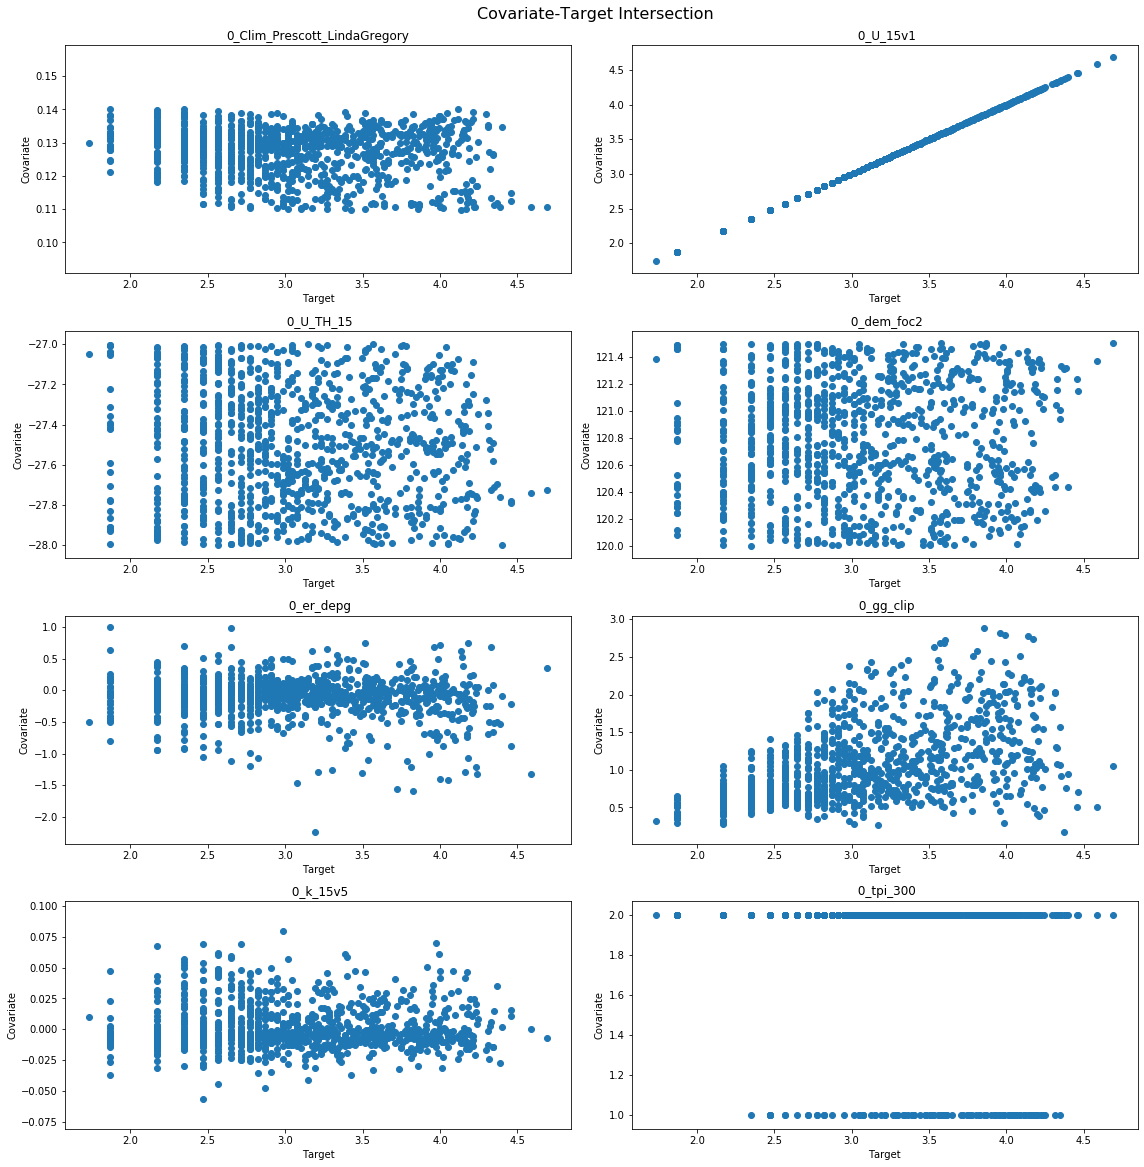

In [3]:
import os

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')

intersection = diagnostics.plot_covariates_x_targets(path, cols=2)
    

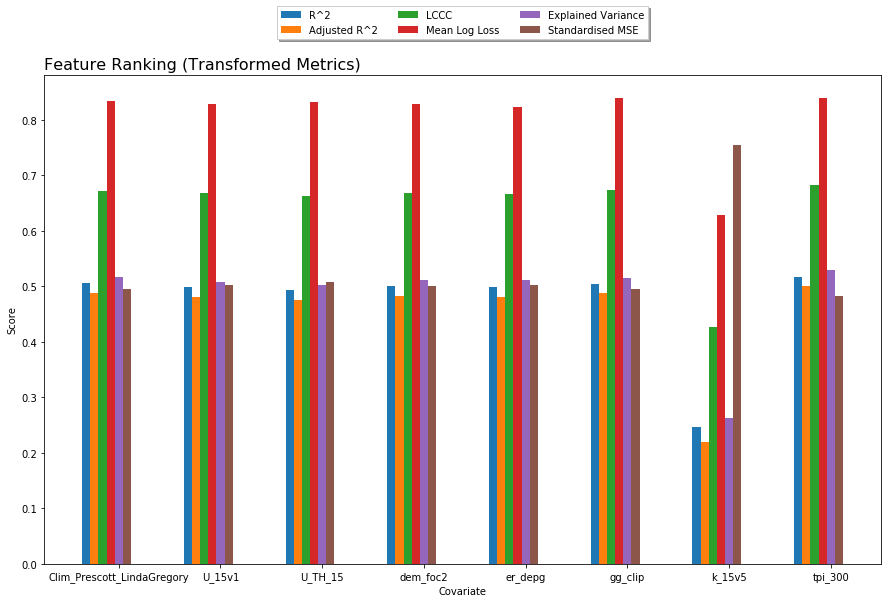

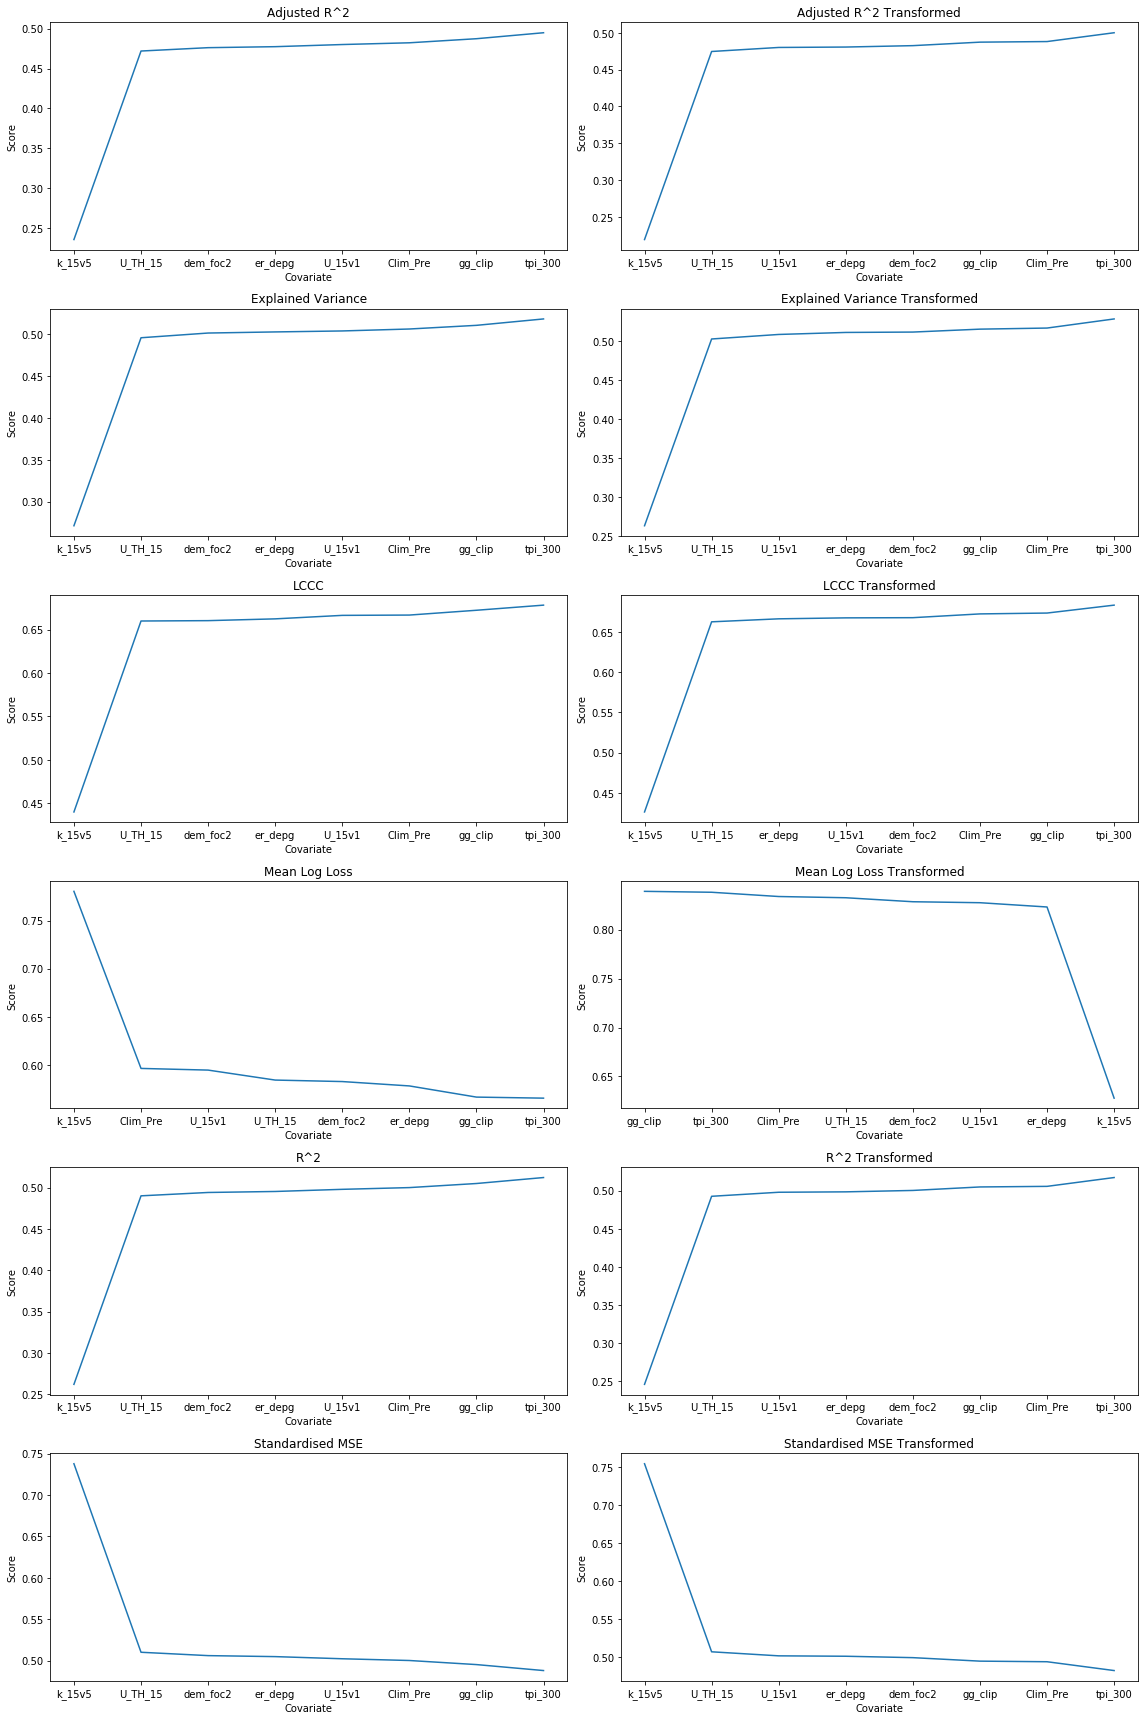

In [4]:
import os

from uncoverml import diagnostics

# Path to feature ranking scores file.
path = os.path.join(SRC, 'tests', 'test_data',
                    'sirsam', 'random_forest', 
                    'out', 'sirsam_Na_randomforest_featureranks.json')

feature_ranks_figure = diagnostics.plot_feature_ranks(path)
feature_ranks_curves = diagnostics.plot_feature_rank_curves(path)


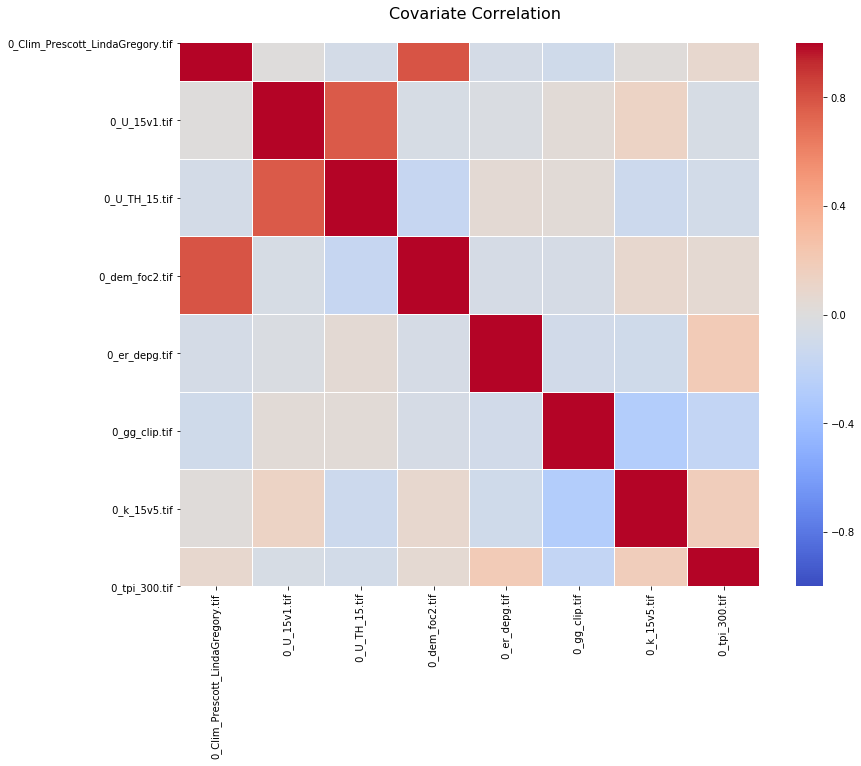

In [5]:
import os
import csv

from uncoverml import diagnostics


path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')

correlation = diagnostics.plot_covariate_correlation(path)


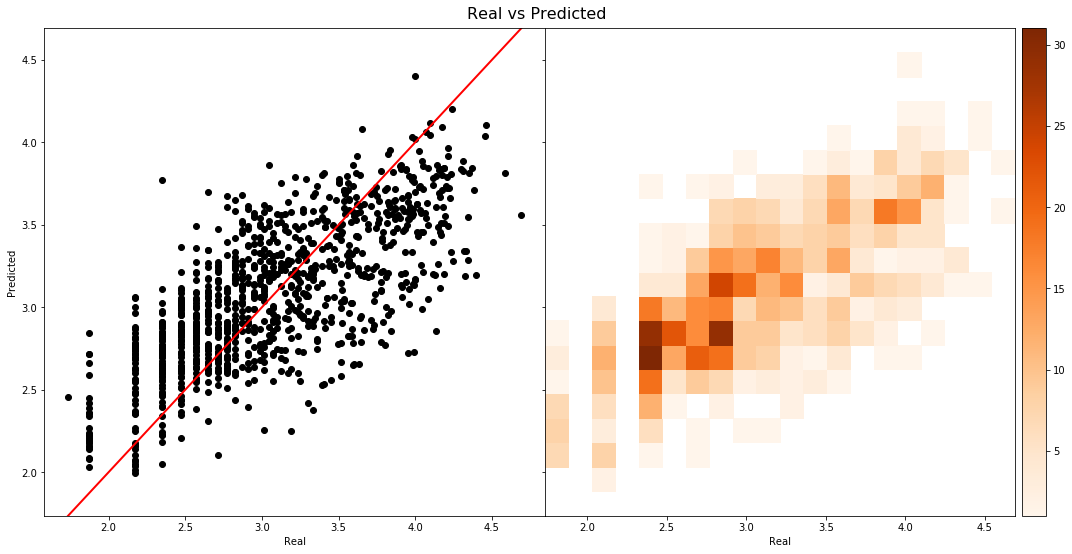

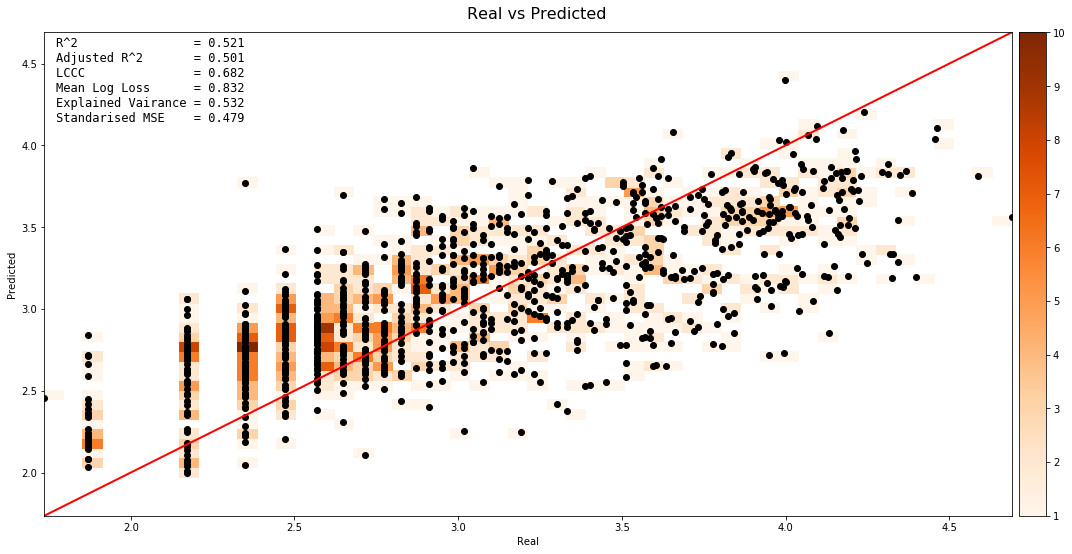

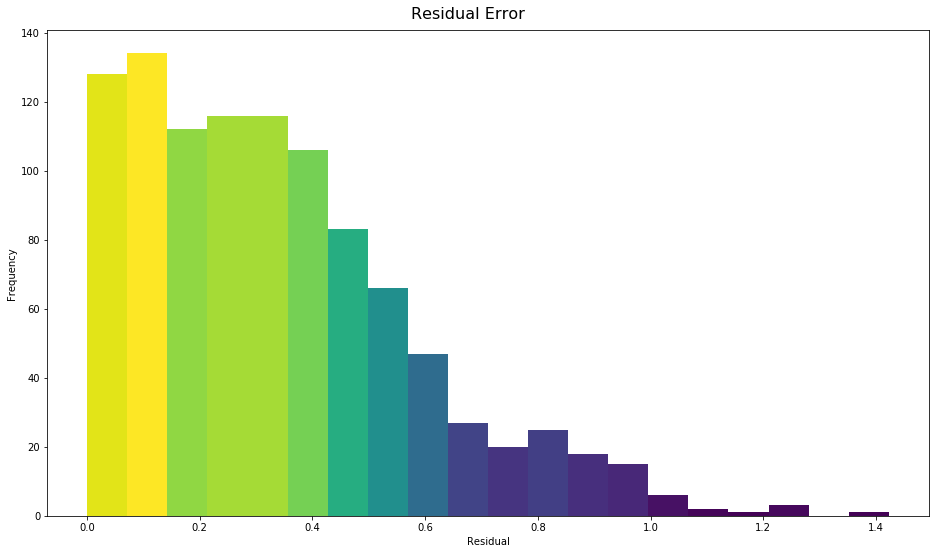

In [19]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

from uncoverml import diagnostics


rc_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')
pred_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_prediction.tif')
crossval_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_crossval_results.csv')
scores_path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_crossval_scores.json')


t, p = diagnostics._real_vs_pred_from_crossval(crossval_path)

real_vs_pred = diagnostics.plot_real_vs_pred(crossval_path, scatter_color='black', hist_cm=plt.cm.Oranges)

# Can optionally include scores and overlay 2D histogram on scatter plot
real_vs_pred = diagnostics.plot_real_vs_pred(crossval_path, scores_path=scores_path, 
                                             overlay=True, bins=50, scatter_color='black', hist_cm=plt.cm.Oranges)

residuals = diagnostics.plot_residual_error(crossval_path)

  

